In [12]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [13]:
class Graph:
    def __init__(self, num_nodes, positions):
        self.num_nodes = num_nodes
        self.positions = positions

    def get_distance(self, u, v):
        x1, y1 = self.positions[u]
        x2, y2 = self.positions[v]
        return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    def get_all_pairs_distances(self):
        dist_matrix = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                dist = self.get_distance(i, j)
                dist_matrix[i][j] = dist_matrix[j][i] = dist

        return dist_matrix

In [14]:
def brute_force_k_center(graph, k):
    dist_matrix = graph.get_all_pairs_distances()
    best_centers = None
    min_radius = float('inf')

    for centers in itertools.combinations(range(graph.num_nodes), k):
        
        max_distance = 0
        for node in range(graph.num_nodes):
            min_distance_to_center = min(dist_matrix[node][center] for center in centers)
            max_distance = max(max_distance, min_distance_to_center)

        # Apdejtuje najbolji centar
        if max_distance < min_radius:
            min_radius = max_distance
            best_centers = centers

    return best_centers, min_radius

In [15]:
def greedy_k_center(graph, k):
    dist_matrix = graph.get_all_pairs_distances()
    centers = []
    remaining_nodes = set(range(graph.num_nodes))

    # Bira random centar
    centers.append(remaining_nodes.pop())
    
    while len(centers) < k:
        max_min_dist = -1
        next_center = None
        for node in remaining_nodes:
            min_dist_to_center = min(dist_matrix[node][center] for center in centers)
            if min_dist_to_center > max_min_dist:
                max_min_dist = min_dist_to_center
                next_center = node

        centers.append(next_center)
        remaining_nodes.remove(next_center)

    radius = 0
    for node in range(graph.num_nodes):
        min_distance_to_center = min(dist_matrix[node][center] for center in centers)
        radius = max(radius, min_distance_to_center)

    return centers, radius

In [16]:
def visualize_graph(graph, centers, radius):
    
    pos = graph.positions
    x, y = zip(*pos)

    plt.scatter(x, y, s=100, c='lightblue', label="Nodes", edgecolors='black', zorder=5)

    for i, (xi, yi) in enumerate(pos):
        plt.text(xi, yi, str(i), fontsize=12, ha='center', va='center', zorder=10)

    for center in centers:
        xi, yi = pos[center]
        circle = plt.Circle((xi, yi), radius, color='red', fill=True, alpha=0.2, linewidth=2)
        plt.gca().add_artist(circle)

    plt.title(f"K Centers with Radius {radius}")
    plt.axis('equal')
    plt.show()

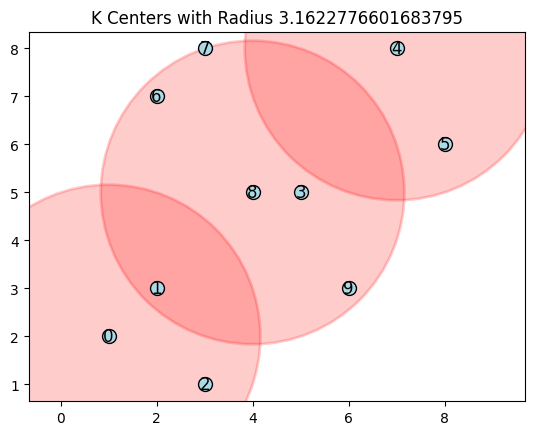

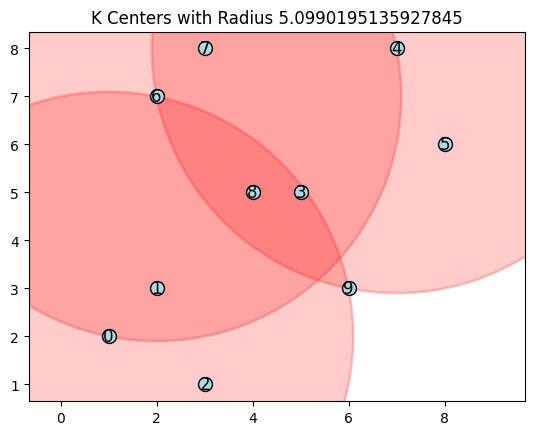

In [17]:
positions = [(1, 2), (2, 3), (3, 1), (5, 5), (7, 8), (8, 6), (2, 7), (3, 8), (4, 5), (6, 3)]

graph = Graph(10, positions)

k = 3

# Brute-force algoritаm
bf_centers, bf_radius = brute_force_k_center(graph, k)
visualize_graph(graph, bf_centers, bf_radius)

# Greedy algoritаm
greedy_centers, greedy_radius = greedy_k_center(graph, k)
visualize_graph(graph, greedy_centers, greedy_radius)